In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import spacy

#### Aula 1 - Análise abstracts

In [3]:
arqs = os.listdir('../dados')

In [5]:
for i,arq in enumerate(arqs):
    
    if i == 0:
        df = pd.read_excel(f'../dados/{arq}')
        df = df.loc[df['Language'] == 'English']
    else:
        aux = pd.read_excel(f'../dados/{arq}')
        aux = aux.loc[aux['Language'] == 'English']
        df = pd.concat([df,aux])

In [6]:
dic_key={}

for keywords in df['Keywords Plus']:
    if not isinstance(keywords,float):
        
        keywords = keywords.split(' ')
        
        for keyword in keywords:
            if ';' in keyword:
                keyword = keyword.replace(';','')
            
            keyword = keyword.lower()
            
            if keyword not in dic_key:
                dic_key[keyword] = 1
            else:
                dic_key[keyword] += 1

dic_key = dict(sorted(dic_key.items(), key=lambda item: item[1]))

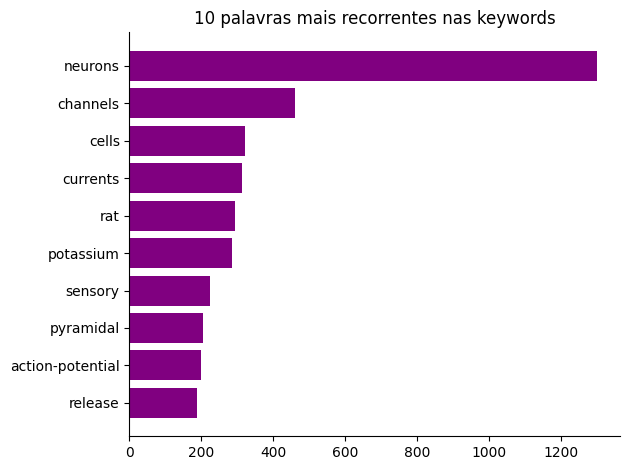

In [9]:
qtd = 10
plt.barh(list(dic_key.keys())[-qtd:],list(dic_key.values())[-qtd:],color='purple')
plt.title(f'{qtd} palavras mais recorrentes nas keywords')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('mais_recorrentes.png',dpi=500)

plt.show()

#### Aula 2 - Extração dos valores em ms

In [77]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [78]:
limite = 20
count = 0
lista_vals = []

for abstract in df['Abstract']:
    if not isinstance(abstract,float):
        if ' ms ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='ms':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='ms':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0: lista_vals.append(vals[::-1])        
        
        if ' millisecond ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='millisecond':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='millisecond':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0: lista_vals.append(vals[::-1])

        if ' milliseconds ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='milliseconds':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='milliseconds':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0: lista_vals.append(vals[::-1])

In [79]:
inf,sup = [],[]

for val in lista_vals:
    if 'and' not in val and 'to' not in val:
        
        if '+' in val and '/-' in val:
            if val[0] != '+':
                # print(val[0],'+/-',val[-1])
                
                if ',' in val[0]:
                    val[0] = val[0].replace(',','.')
                
                if ',' in val[-1]:
                    val[-1] = val[-1].replace(',','.')
                    
                inf.append(round(float(val[0])-float(val[-1]),4))
                sup.append(round(float(val[0])+float(val[-1]),4))
                
                # print(f'inf {float(val[0])-float(val[-1])}')
                # print(f'sup {float(val[0])+float(val[-1])}')
            # print()
            
        # elif '-' in val:
            # print(val)

In [80]:
print('Contagem de ocorrências',count)

Contagem de ocorrências 366


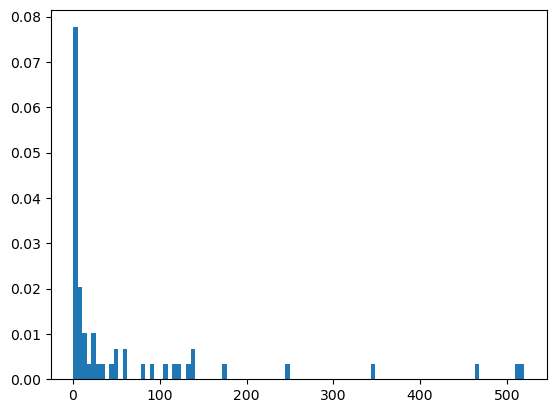

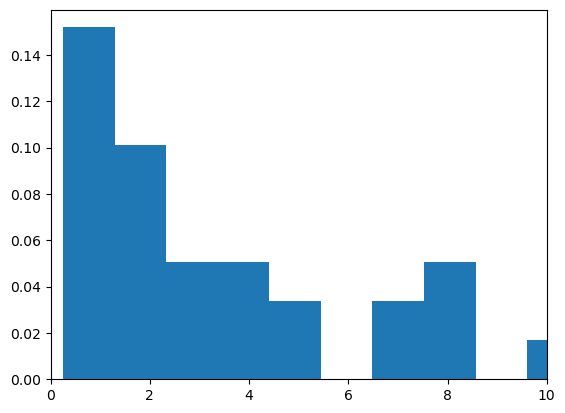

In [81]:
plt.hist(inf,bins=100,density=True)
plt.show()
plt.hist(inf,bins=500,density=True)
plt.xlim(0,10)
plt.show()

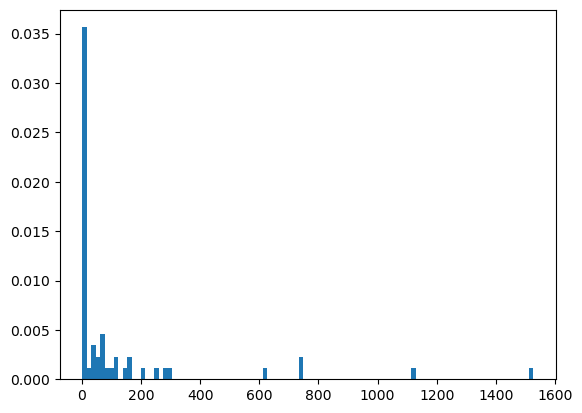

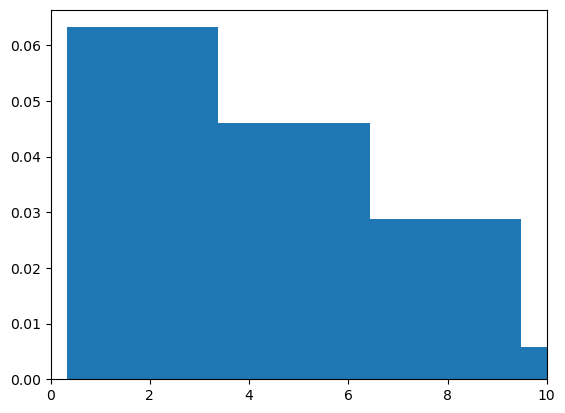

In [82]:
plt.hist(sup,bins=100,density=True)
plt.show()
plt.hist(sup,bins=500,density=True)
plt.xlim(0,10)
plt.show()

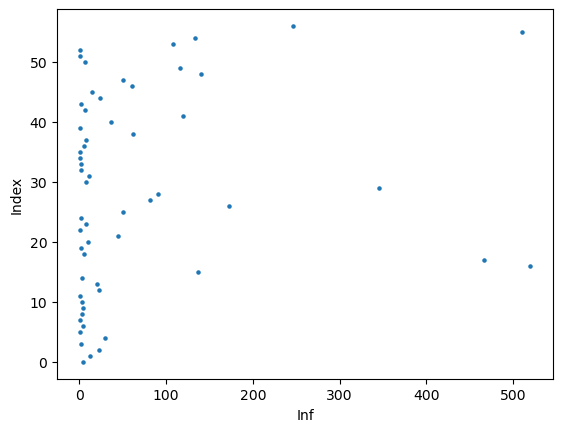

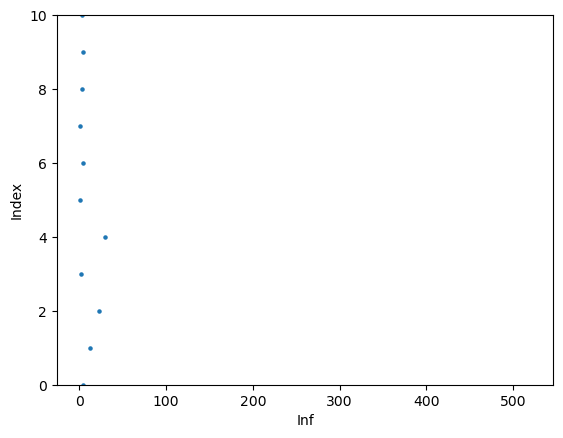

In [83]:
import matplotlib.pyplot as plt

# Primeiro gráfico de dispersão com x em y e y em x
plt.scatter(inf, range(len(inf)), s=5)  # Invertendo x e y
plt.xlabel('Inf')
plt.ylabel('Index')
plt.show()

# Segundo gráfico de dispersão com x em y e y em x
plt.scatter(inf, range(len(inf)), s=5)  # Invertendo x e y
plt.xlabel('Inf')
plt.ylabel('Index')
plt.ylim(0, 10)  # Definindo o limite do eixo y
plt.show()

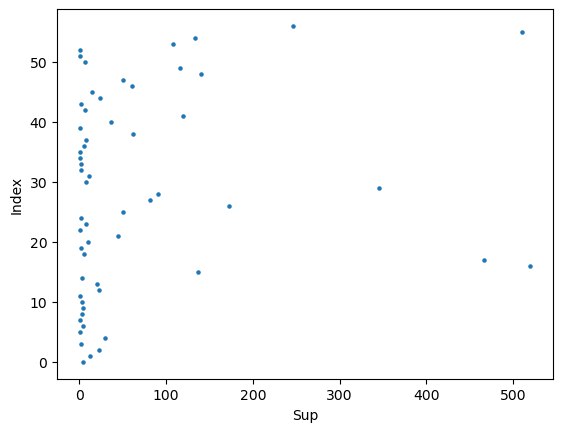

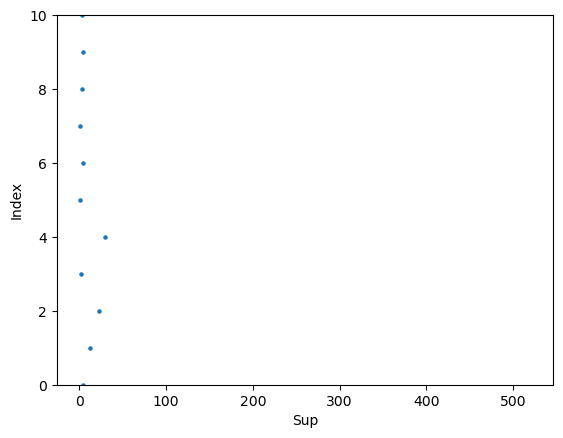

In [84]:
import matplotlib.pyplot as plt

# Primeiro gráfico de dispersão com x em y e y em x
plt.scatter(inf, range(len(sup)), s=5)  # Invertendo x e y
plt.xlabel('Sup')
plt.ylabel('Index')
plt.show()

# Segundo gráfico de dispersão com x em y e y em x
plt.scatter(inf, range(len(sup)), s=5)  # Invertendo x e y
plt.xlabel('Sup')
plt.ylabel('Index')
plt.ylim(0, 10)  # Definindo o limite do eixo y
plt.show()

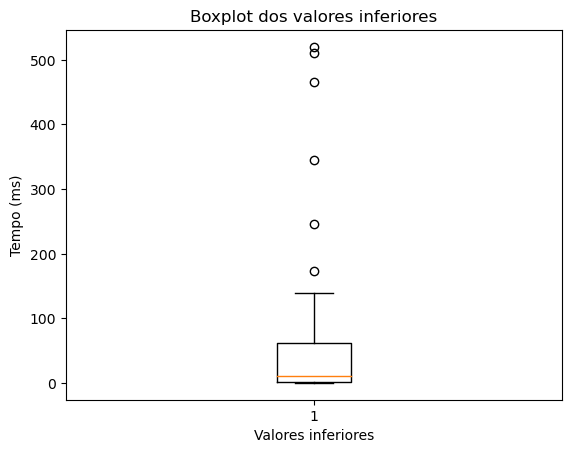

In [85]:
# Criar um boxplot com os valores de 'inf'
plt.boxplot(inf)
plt.xlabel('Valores inferiores')
plt.ylabel('Tempo (ms)')
plt.title('Boxplot dos valores inferiores')
plt.show()

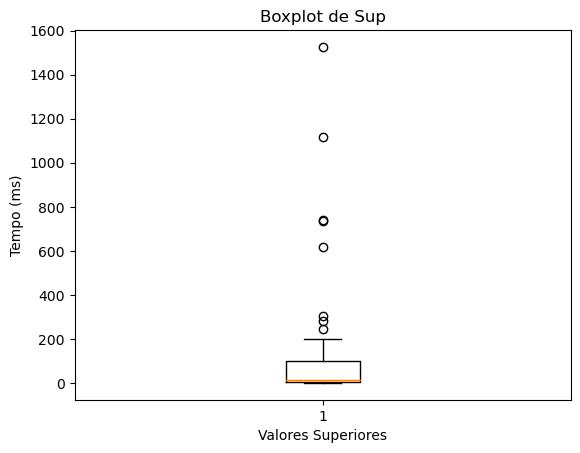

In [86]:
# Criar um boxplot com os valores de 'inf'
plt.boxplot(sup)
plt.xlabel('Valores Superiores')
plt.ylabel('Tempo (ms)')
plt.title('Boxplot de Sup')
plt.show()


In [87]:
def calculo_mediana(lista):
    n = len(lista)
    sorted_lista = sorted(lista)

    if n % 2 == 0:
        metade_direita = n//2
        metade_esquerda = metade_direita - 1
        mediana = (sorted_lista[metade_esquerda] + sorted_lista[metade_direita])/2

    else:
        metade = n//2
        mediana = sorted_lista[metade]

    return mediana

In [88]:
calculo_mediana(inf)

10.2

In [89]:
calculo_mediana(sup)

14.3

In [90]:
sup_cresc = sorted(sup, key=int)[0:49]
sup_cresc

[0.7,
 0.46,
 0.53,
 0.44,
 0.33,
 1.2,
 1.56,
 2.1,
 2.87,
 2.8,
 3.4,
 3.1,
 3.4,
 4.8,
 4.3,
 4.1,
 5.6,
 5.688,
 5.8,
 6.5,
 8.3,
 9.0,
 9.31,
 9.2,
 11.0,
 12.8,
 14.0,
 14.3,
 14.81,
 14.2,
 15.1,
 27.0,
 42.0,
 45.0,
 46.0,
 52.0,
 57.8,
 67.0,
 73.0,
 74.1,
 74.0,
 91.0,
 98.5,
 120.0,
 122.1,
 143.0,
 159.0,
 159.0,
 202.0]

In [91]:
calculo_mediana(sup_cresc)

11.0

In [92]:
inf_cresc = sorted(inf, key=int)[0:49]
inf_cresc

[0.4,
 0.5,
 0.42,
 0.47,
 0.4,
 0.42,
 0.25,
 1.7,
 1.7,
 1.0,
 1.7,
 1.8,
 1.2,
 2.9,
 2.722,
 2.2,
 2.09,
 3.0,
 3.9,
 4.2,
 4.3,
 5.2,
 5.3,
 6.8,
 7.75,
 7.8,
 7.03,
 8.2,
 10.2,
 10.7,
 12.0,
 15.0,
 20.0,
 23.0,
 23.0,
 24.0,
 30.0,
 36.0,
 45.0,
 50.4,
 50.0,
 61.5,
 61.0,
 80.9,
 91.0,
 108.0,
 116.0,
 119.9,
 133.0]

In [93]:
calculo_mediana(inf_cresc)

7.03

In [94]:
soma1 = sum(inf)
media1 = soma1/(len(inf))
print(media1)

65.66407017543861


In [95]:
soma2 = sum(sup)
media2 = soma2/(len(sup))
print(media2)

130.0403157894737


In [96]:
soma3 = sum(inf_cresc)
media3 = soma3/(len(inf_cresc))
print(media3)

24.611265306122448


In [97]:
soma4 = sum(sup_cresc)
media4 = soma4/(len(sup_cresc))
print(media4)

37.63669387755102


In [98]:
nlp = spacy.load('en_core_web_sm')

In [112]:
    i = -1
    for abstract in df['Abstract']:
        #print('Abstract', i)
        i += 1
        doc = nlp(str(abstract)) #transformei o abstract em string, pois tive problemas com abstract sendo float (?)
        for sentence in doc.sents:
            #print(sentence)
            property = re.search("[Aa]ction potential", str(sentence)) or re.search('mV', str(sentence))
            #print(property, type(property))
            if property != None:
                #print(property)
                value = re.search("ms", str(sentence)) or re.search("milissecond", str(sentence)) or re.search("milisseconds", str(sentence))
                if value != None:
                    compositions = re.findall(r"\b(?:\d{1,4}|2000)\b", str(sentence))
                    if len(compositions) != 0:
                        #print('No Abstract', i, 'a composição:', compositions, 'tem um', property[0], 'de', value[0])
                        print(i,compositions, property[0], value[0])
                        print('Sentença de extração do abstract', i, ':', sentence)

4 ['1', '0', '46', '0', '12', '7', '0', '17', '0', '05'] action potential ms
Sentença de extração do abstract 4 : BK currents contribute significantly more to total potassium current and single action potentials in neurons of 1-day old rats (with BK blockade extending action potential duration by 0.46 +/- 0.12 ms) than in those of 7-day old rats (with BK blockade extending action potential duration by 0.17 +/- 0.05 ms).
12 ['50', '4', '5', '0', '3', '88', '20', '55'] Action potential ms
Sentença de extração do abstract 12 : Action potential duration at 50% repolarization was increased from 4.5 +/- 0.3 ms to 88 +/- 20 ms and resting membrane potential decreased from -55
23 ['40', '120'] mV ms
Sentença de extração do abstract 23 : These currents had mean activation time constants of similar to 40 ms at -120 mV and were Cs+ sensitive and Ba2+ insensitive.
28 ['0', '7', '1', '5', '1', '6', '2', '9', '56', '61'] action potential ms
Sentença de extração do abstract 28 : Type II neurons were 

In [113]:
i = -1
for abstract in df['Abstract']:
    i += 1
    doc = nlp(str(abstract))
    for sentence in doc.sents:
        property = re.search("[Aa]ction potential|mV", str(sentence))
        if property is not None:
            value = re.search(r"\b(?:\d{1,4}|2000)\s*ms\b", str(sentence)) or re.search(r"\b(?:\d{1,4}|2000)\s*milissecond(?:s?)\b", str(sentence))
            if value is not None:
                # Se encontrou um valor numérico associado a "ms", extrair e imprimir
                print(i, value.group())
                print('Sentença de extração do abstract', i, ':', sentence)

4 12 ms
Sentença de extração do abstract 4 : BK currents contribute significantly more to total potassium current and single action potentials in neurons of 1-day old rats (with BK blockade extending action potential duration by 0.46 +/- 0.12 ms) than in those of 7-day old rats (with BK blockade extending action potential duration by 0.17 +/- 0.05 ms).
12 3 ms
Sentença de extração do abstract 12 : Action potential duration at 50% repolarization was increased from 4.5 +/- 0.3 ms to 88 +/- 20 ms and resting membrane potential decreased from -55
23 40 ms
Sentença de extração do abstract 23 : These currents had mean activation time constants of similar to 40 ms at -120 mV and were Cs+ sensitive and Ba2+ insensitive.
28 5 ms
Sentença de extração do abstract 28 : Type II neurons were divided into two groups based on their spike durations: short-duration neurons with an action potential duration of 0.7-1.5 ms and long-duration neurons with an action potential duration of 1.6-2.9 ms. Choline a

In [119]:
i = -1
for abstract in df['Abstract']:
    i += 1
    doc = nlp(str(abstract))
    for sentence in doc.sents:
        property = re.search("[Aa]ction potential|mV", str(sentence))
        if property is not None:
            value = re.search(r"(\b(?:\d+(?:\.\d*)?|\.\d+)(?:\s*(?:±|\+/-)\s*\d+)?\s*ms)\b", str(sentence)) or re.search(r"(\b(?:\d+(?:\.\d*)?|\.\d+)(?:\s*(?:±|\+/-)\s*\d+)?\s*milissecond(?:s?)\b)", str(sentence))
            if value is not None:
                # Se encontrou um valor numérico associado a "ms", extrair e imprimir
                print(i, value.group(1))  # value.group(1) é usado para extrair o valor numérico com a variação
                print('Sentença de extração do abstract', i, ':', sentence)


4 0.12 ms
Sentença de extração do abstract 4 : BK currents contribute significantly more to total potassium current and single action potentials in neurons of 1-day old rats (with BK blockade extending action potential duration by 0.46 +/- 0.12 ms) than in those of 7-day old rats (with BK blockade extending action potential duration by 0.17 +/- 0.05 ms).
12 0.3 ms
Sentença de extração do abstract 12 : Action potential duration at 50% repolarization was increased from 4.5 +/- 0.3 ms to 88 +/- 20 ms and resting membrane potential decreased from -55
23 40 ms
Sentença de extração do abstract 23 : These currents had mean activation time constants of similar to 40 ms at -120 mV and were Cs+ sensitive and Ba2+ insensitive.
28 1.5 ms
Sentença de extração do abstract 28 : Type II neurons were divided into two groups based on their spike durations: short-duration neurons with an action potential duration of 0.7-1.5 ms and long-duration neurons with an action potential duration of 1.6-2.9 ms. Cho